<a href="https://colab.research.google.com/github/chauhansrc/Image-mood-classification/blob/main/Image_Mood_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Dependencies

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 578.1 MB 8.1 kB/s 
     |████████████████████████████████| 578.1 MB 6.7 kB/s 
     |████████████████████████████████| 511.8 MB 27 kB/s 


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)



## Removing Unwanted Images

Removing Images with unwanted formats or corrupt images.

In [ ]:
import cv2
import imghdr


In [ ]:
data_dir = 'drive/MyDrive/Image Classification/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)



Image not in ext list drive/MyDrive/Image Classification/data/happy/31418025-diverse-happy-people.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/56f455011e0000b300705475.jpeg
Image not in ext list drive/MyDrive/Image Classification/data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/1200px-Happy_People.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list drive/MyDrive/Image Classification/data/happy/1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in ext list drive/MyDrive/Image Classification/data/sad/39843138-sad-man.jpg
Image not in ext list drive/MyDrive/Image Classificatio

## Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 188 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

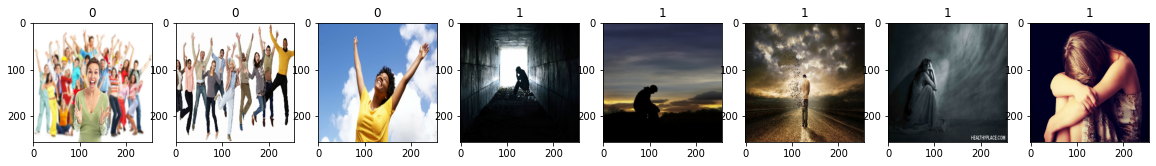

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          ...,
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01],
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01],
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01]],
 
         [[9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          ...,
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01],
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01],
          [9.68627453e-01, 9.76470590e-01, 9.72549021e-01]],
 
         [[9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          [9.84313726e-01, 9.84313726e-01, 9.84313726e-01],
          ...,
          [9.68627453e-01, 9.76470590e-01, 9.7254

## Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building a Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 4s/step - loss: 0.8658 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 17s 4s/step - loss: 0.6413 - accuracy: 0.6875 - val_loss: 0.6236 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 12s 3s/step - loss: 0.5903 - accuracy: 0.6953 - val_loss: 0.6231 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.5750 - accuracy: 0.7109 - val_loss: 0.5161 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 15s 3s/step - loss: 0.4515 - accuracy: 0.7812 - val_loss: 0.4440 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.4167 - accuracy: 0.7969 - val_loss: 0.3549 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.3580 - accuracy: 0.8516 - val_loss: 0.3339 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

## Plot Performance

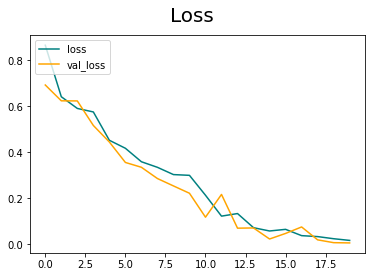

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

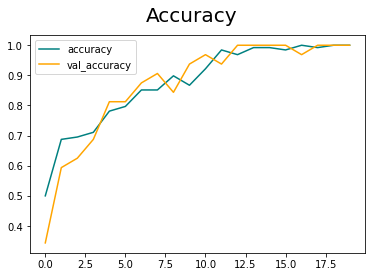

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## Test

In [ ]:
import cv2

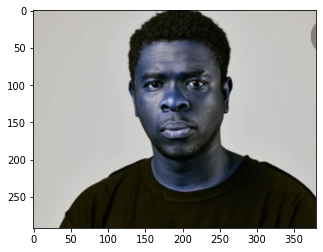

In [ ]:
img = cv2.imread('sad_person.png')
plt.imshow(img)
plt.show()

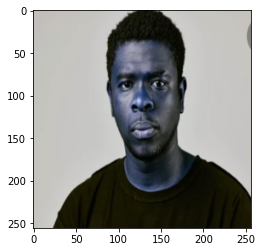

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
yhat

array([[0.9938827]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
